# Capstone Project: Airline Departure Delays
## Notebook II (Exploratory Data Analysis)


Author: Julie Vovchenko

---

## Table of Content:
- [Distribution Per Quarter](#Distribution-Per-Quarter)
-  [Distribution Per Month](#Distribution-Per-Month)  
-  [Distribution Per Day of Week](#Distribution-Per-Day-of-Week) 
-  [Distribution Per Carrier](#Distribution-Per-Carrier) 
-  [Distribution Per Origin Airport](#Distribution-Per-Origin-Airport) 
-  [Distribution Per Day of a Month](#Distribution-Per-Day-of-a-Month) 
-  [Distribution Per Carrier](#Distribution-Per-Carrier) 
-  [Distribution Per Daily Hour](#Distribution-Per-Daily-Hour) 
-  [Distribution of Departure Delays (minutes)](#Distribution-of-Departure-Delays-(minutes))
-  [Distribution of Departure Delay Groups](#Distribution-of-Departure-Delay-Groups)
-  [Distribution Per Flight Duration](#Distribution-Per-Flight-Duration)
-  [Distribution Per Distance](#Distribution-Per-Distance)

## Dataset

- [Cleaned Data for 2018](https://drive.google.com/open?id=1jAT2eYlOb6iwaCs48KP1Tqo9uRdMzYWg)

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading Carrier On-Time Performance Statistic table
# for the first six months of 2018 
df = pd.read_csv('../data/2018_reporting_clean.csv')
df.shape

(7096851, 54)

In [3]:
# Setting maximum columns and rows to display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Viewing the dataset of all flights
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2018,1,1,27,6,2018-01-27,UA,19977,UA,N26232,369,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,615,602.0,-13.0,0.0,0.0,0.0,0600-0659,19.0,621.0,749.0,7.0,808,756.0,-12.0,0.0,0.0,-1.0,0800-0859,0.0,173.0,174.0,148.0,966.0,4,0.0
1,2018,1,1,27,6,2018-01-27,UA,19977,UA,N477UA,368,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,618,614.0,-4.0,0.0,0.0,0.0,0600-0659,16.0,630.0,808.0,5.0,831,813.0,-18.0,0.0,0.0,-2.0,0800-0859,0.0,133.0,119.0,98.0,679.0,3,0.0
2,2018,1,1,27,6,2018-01-27,UA,19977,UA,N13720,367,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,830,828.0,-2.0,0.0,0.0,0.0,0800-0859,17.0,845.0,1055.0,13.0,1107,1108.0,1.0,1.0,0.0,0.0,1100-1159,0.0,217.0,220.0,190.0,1208.0,5,0.0
3,2018,1,1,27,6,2018-01-27,UA,19977,UA,N16217,366,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,650,641.0,-9.0,0.0,0.0,0.0,0600-0659,17.0,658.0,1230.0,12.0,1250,1242.0,-8.0,0.0,0.0,-1.0,1200-1259,0.0,240.0,241.0,212.0,1744.0,7,0.0
4,2018,1,1,27,6,2018-01-27,UA,19977,UA,N33714,365,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1824,1810.0,-14.0,0.0,0.0,0.0,1800-1859,11.0,1821.0,2013.0,8.0,2045,2021.0,-24.0,0.0,0.0,-2.0,2000-2059,0.0,141.0,131.0,112.0,820.0,4,0.0


In [5]:
# Determining all flights origins in this data
df['ORIGIN_STATE_NM'].unique()

array(['Florida', 'Washington', 'Virginia', 'California', 'Texas',
       'New Jersey', 'Hawaii', 'Nevada', 'Colorado', 'North Carolina',
       'Ohio', 'Massachusetts', 'Tennessee', 'Iowa', 'Pennsylvania',
       'Utah', 'Arizona', 'Illinois', 'Georgia', 'Maryland', 'Kansas',
       'Montana', 'Wisconsin', 'Idaho', 'Oregon', 'New York', 'Kentucky',
       'Michigan', 'U.S. Pacific Trust Territories and Possessions',
       'Wyoming', 'Missouri', 'Louisiana', 'Indiana', 'Connecticut',
       'South Carolina', 'Puerto Rico', 'Minnesota', 'Vermont',
       'South Dakota', 'New Mexico', 'Alaska', 'Oklahoma', 'Nebraska',
       'Maine', 'North Dakota', 'Arkansas', 'West Virginia',
       'Mississippi', 'New Hampshire', 'Alabama', 'U.S. Virgin Islands',
       'Rhode Island'], dtype=object)

**Observation:** We see that local flight happening between all 50 states

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096851 entries, 0 to 7096850
Data columns (total 54 columns):
YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                  object
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    int64
OP_CARRIER               object
TAIL_NUM                 object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_FIPS        int64
ORIGIN_STATE_NM          object
ORIGIN_WAC               int64
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_FIPS          int64
DEST_STATE_NM            object
DEST_WA

In [7]:
# Checking the distribution of all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,7096851.0,2.018000e+03,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
QUARTER,7096851.0,2.527277e+00,1.103697,1.0,2.0,3.0,4.0,4.0
MONTH,7096851.0,6.579906e+00,3.393522,1.0,4.0,7.0,10.0,12.0
DAY_OF_MONTH,7096851.0,1.579747e+01,8.773545,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,7096851.0,3.938113e+00,1.996630,1.0,2.0,4.0,6.0,7.0
OP_CARRIER_AIRLINE_ID,7096851.0,1.998422e+04,379.611487,19393.0,19790.0,19977.0,20366.0,21171.0
OP_CARRIER_FL_NUM,7096851.0,2.598262e+03,1858.317975,1.0,1021.0,2122.0,4062.0,7909.0
ORIGIN_AIRPORT_ID,7096851.0,1.265126e+04,1520.008998,10135.0,11292.0,12889.0,13931.0,16218.0
ORIGIN_AIRPORT_SEQ_ID,7096851.0,1.265130e+06,152000.639707,1013505.0,1129202.0,1288903.0,1393102.0,1621802.0
ORIGIN_CITY_MARKET_ID,7096851.0,3.174160e+04,1295.618112,30070.0,30713.0,31453.0,32467.0,36133.0


**Observation:**  
Most of the numeric columns have reasonable distribution.  
**DEP_DELAY** has negative values, which is expected, since negative number represents count of minutes that airplane left earlier than scheduled.  
**CRS_ELAPSED_TIME** has negative values, we will explore this situation below.  
**ACTUAL_ELAPSED_TIME** minimum flight time is 14 minutes. Need to explore if the value is correct. 

In [8]:
# Viewing all the instances with negative scheduled time an airplane spends in the air 
df[df['CRS_ELAPSED_TIME']<0]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
657489,2018,1,2,7,3,2018-02-07,YX,20452,YX,N872RW,5972,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1230,1226.0,-4.0,0.0,0.0,0.0,1200-1259,31.0,1257.0,2032.0,9.0,1540,2041.0,NaN,NaN,NaN,NaN,1500-1559,1.0,-60.0,NaN,NaN,733.0,3,1.0
665642,2018,1,2,17,6,2018-02-17,YX,20452,YX,N642RW,3418,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1700,1700.0,0.0,0.0,0.0,0.0,1700-1759,13.0,1713.0,2312.0,98.0,2019,50.0,NaN,NaN,NaN,NaN,2000-2059,1.0,-60.0,NaN,NaN,748.0,3,1.0
665643,2018,1,2,24,6,2018-02-24,YX,20452,YX,N861RW,3650,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,14730,1473003,33044,SDF,"Louisville, KY",KY,21,Kentucky,52,1945,1942.0,-3.0,0.0,0.0,0.0,1900-1959,17.0,1959.0,4.0,7.0,2309,11.0,NaN,NaN,NaN,NaN,2300-2359,1.0,-60.0,NaN,NaN,788.0,4,1.0
665645,2018,1,2,26,1,2018-02-26,YX,20452,YX,N647RW,3540,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1425,1415.0,-10.0,0.0,0.0,0.0,1400-1459,28.0,1443.0,1928.0,9.0,1733,1937.0,NaN,NaN,NaN,NaN,1700-1759,1.0,-60.0,NaN,NaN,599.0,3,1.0
5830019,2018,4,10,9,2,2018-10-09,YX,20452,YX,N730YX,3534,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,2120,604.0,524.0,524.0,1.0,12.0,2100-2159,16.0,620.0,759.0,5.0,2336,804.0,508.0,508.0,1.0,12.0,2300-2359,0.0,-99.0,60.0,39.0,224.0,1,0.0


In [9]:
# Taking a closer look at all instances with scheduled time an airplane spends in the air 
df[df['CRS_ELAPSED_TIME']<0][['CRS_DEP_TIME','CRS_ARR_TIME',
                              'CRS_ELAPSED_TIME','OP_UNIQUE_CARRIER']]

,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,OP_UNIQUE_CARRIER
657489,1230,1540,-60.0,YX
665642,1700,2019,-60.0,YX
665643,1945,2309,-60.0,YX
665645,1425,1733,-60.0,YX
5830019,2120,2336,-99.0,YX


**Observation:**  
There is no reason for scheduled elapsed time to be negative, and this is a clear mistake. We can have two approaches in this situation: (1) calculate the actual air flight time using columns CRS_DEP_TIME and CRS_ARR_TIME, or (2) we can simply delete with rows. We will choose the second approach since there are only 5 rows with incorrect values.

In [10]:
# Removing flights with negative air time from our dataframe
df.drop(df[df['CRS_ELAPSED_TIME']<0].index, inplace = True) 

In [11]:
df.shape

(7096846, 54)

In [12]:
# Checking how many flights with time in the air less than 15 minutes
df[df['ACTUAL_ELAPSED_TIME'] <15].shape

(2, 54)

In [13]:
df[df['ACTUAL_ELAPSED_TIME'] <15]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
2880685,2018,2,6,21,4,2018-06-21,AS,19930,AS,N622AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1036,1024.0,-12.0,0.0,0.0,0.0,1000-1059,4.0,1028.0,1037.0,1.0,1058,1038.0,-20.0,0.0,0.0,-2.0,1000-1059,0.0,22.0,14.0,9.0,31.0,1,0.0
5610797,2018,4,10,15,1,2018-10-15,AS,19930,AS,N611AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1104,1058.0,-6.0,0.0,0.0,0.0,1100-1159,4.0,1102.0,1111.0,1.0,1125,1112.0,-13.0,0.0,0.0,-1.0,1100-1159,0.0,21.0,14.0,9.0,31.0,1,0.0


**Observation:**
These two Alaskan airports (WRG and PSG) are quite close to each other and the time is correct.

In [14]:
# Placing all info of delayed flights into a seperate dataframe
delay_df = df[df['DEP_DEL15'] == 1]

In [15]:
# Function that plots distribution for a variable
def plot_graph(df, title, size = (7,5), ylabel = '', color = 'Blues_r', 
               xlabel = 'Count of Delayed Flights'):
    plt.figure(figsize=size);
    sns.set(style="whitegrid")
    
    # setting a palette
    pal = sns.color_palette(color, len(df))
    # credit: http://stackoverflow.com/a/6266510/1628638
    # sorts tables to color darker highest values
    rank = df.argsort().argsort()   

    sns.barplot(x=df, 
                y=df.index, 
                palette=np.array(pal[::-1])[rank],
                orient = 'h');

    plt.title (title, size=20);
    plt.ylabel(ylabel, size = 13);
    plt.xlabel(xlabel, size = 13);
    # setting size of yticks and xticks to 20
    plt.yticks(size = 13);
    plt.xticks(size = 13);

### Distribution Per Quarter

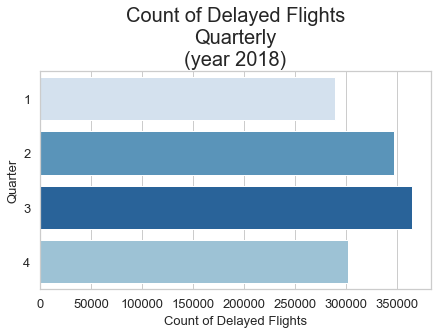

In [16]:
# Calculating total count of delayed flights per quarter
data_quarter_delay = delay_df.groupby('QUARTER')['YEAR'].count()
plot_graph(data_quarter_delay, size = (7,4), ylabel = 'Quarter',
           title = 'Count of Delayed Flights\nQuarterly\n(year 2018)')

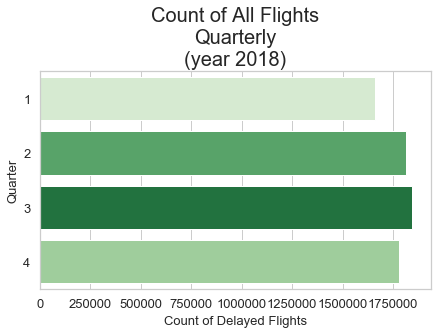

In [17]:
# Calculating total count of all flights per quarter
data_quarter_all = df.groupby('QUARTER')['YEAR'].count()
plot_graph(data_quarter_all,
           title = 'Count of All Flights\nQuarterly\n(year 2018)',
           size = (7,4), ylabel = 'Quarter', color = 'Greens_r')

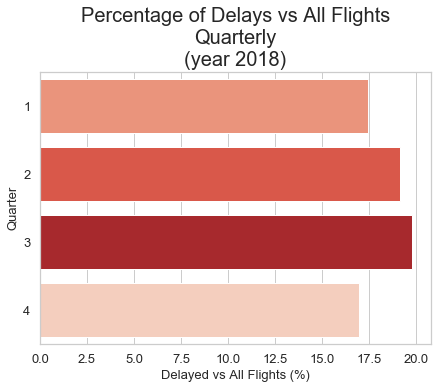

In [18]:
# Calculating total percentage of delayed vs all flights per quarter
quarter_percentage = (data_quarter_delay/data_quarter_all)*100
plot_graph(quarter_percentage, 
           title = 'Percentage of Delays vs All Flights\nQuarterly\n(year 2018)',
           color = 'Reds_r', ylabel = 'Quarter', xlabel = 'Delayed vs All Flights (%)')

**Observation:**  
Third quarter (July, August, September) of year 2018, has the most amount of flights which effects flight delays. We assume that it has to do with seasonal rise of flights volume. Next we break it down by months to see the break down.

### Distribution Per Month

In [19]:
# Creating monthly dictionary, to replace the number of each value to its corresponding name
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
              6: 'June', 7: 'July', 8: 'August', 9: 'September', 
              10: 'October', 11: 'November', 12: 'December'}

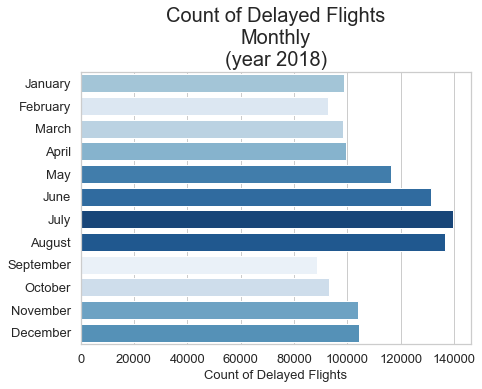

In [20]:
# Calculating total count of delayed flights per month
data_month_delay = delay_df.groupby('MONTH')['YEAR'].count()
data_month_delay.index = data_month_delay.index.map(month_dict)
plot_graph(data_month_delay, 
           title = 'Count of Delayed Flights\nMonthly\n(year 2018)')

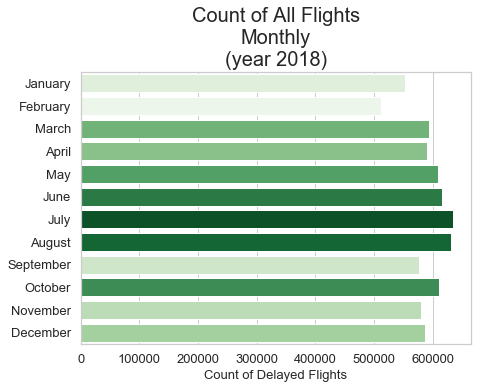

In [21]:
# Calculating total count of all flights per month
data_month_all = df.groupby('MONTH')['YEAR'].count()
data_month_all.index = data_month_all.index.map(month_dict)
plot_graph(data_month_all, color = 'Greens_r',
           title = 'Count of All Flights\nMonthly\n(year 2018)')

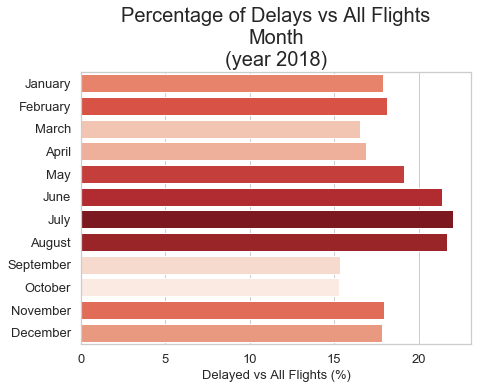

In [22]:
# Calculating total count of delayed vs all flights per month
month_percentage = (data_month_delay/data_month_all)*100
plot_graph(month_percentage, 
           title = 'Percentage of Delays vs All Flights\nMonth\n(year 2018)',
           color = 'Reds_r', xlabel = 'Delayed vs All Flights (%)')

**Observation:**  
Monthly delays can be some what explained by overall flight volume rise, but we believe there are additional factors that might effect it: airport/carrier teams might be understaffed due to vacations, equipment failure due to temperature rise.  
Since quarter and months have depend on each other, we will be using month as our feature.

### Distribution Per Day of Week

In [23]:
weekday_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

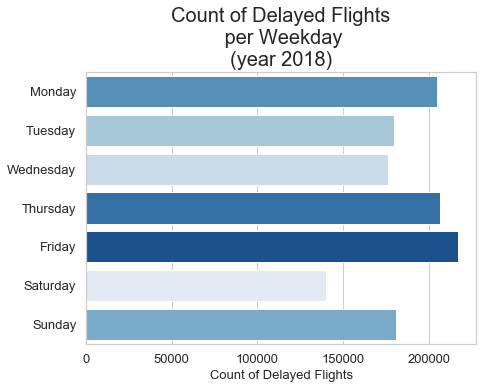

In [24]:
# Calculating total count of delayed flights per day of the week
data_weekday_delay = delay_df.groupby('DAY_OF_WEEK')['YEAR'].count()
# Renaming our columns to weekdays
data_weekday_delay.index = data_weekday_delay.index.map(weekday_dict)
plot_graph(data_weekday_delay, 
           title = 'Count of Delayed Flights\n per Weekday\n(year 2018)')

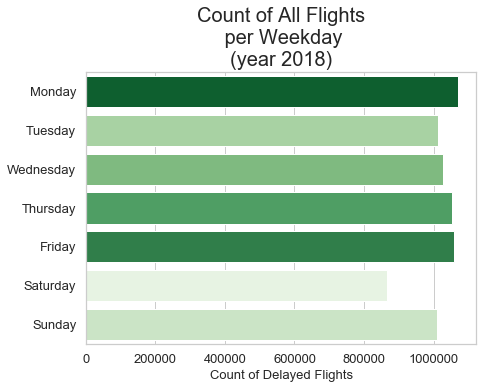

In [25]:
# Calculating total count of all flights per day of week
data_weekday_all = df.groupby('DAY_OF_WEEK')['YEAR'].count()
data_weekday_all.index = data_weekday_all.index.map(weekday_dict)
plot_graph(data_weekday_all,  color='Greens_r',
           title = 'Count of All Flights\n per Weekday\n(year 2018)')

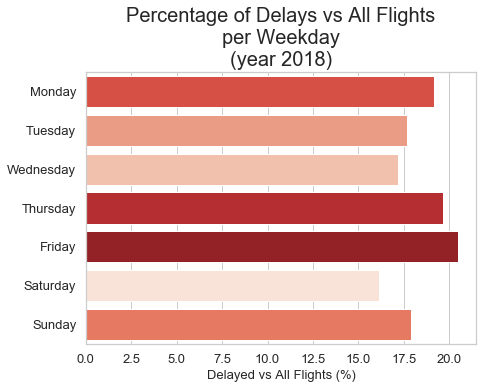

In [26]:
# Calculating total percentage of delayed vs all flights per day of week
weekday_percentage = (data_weekday_delay/data_weekday_all)*100
plot_graph(weekday_percentage, color = 'Reds_r', xlabel = 'Delayed vs All Flights (%)',
           title = 'Percentage of Delays vs All Flights\nper Weekday\n(year 2018)')

**Observation:**  
Monday, Thursday and Friday have the highest count of delayed flights. We believe it is due to volume of all flights on those days, since most business and leisure trips are taken at the beginning of the week or right before the weekend.  
Also, weekday will be used as one of the features to predict whether the flight will be delayed or not.

### Distribution Per Carrier

In [27]:
# Getting a list of carriers with delayed departure in 2018
delay_df['OP_UNIQUE_CARRIER'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

**Observation:**  
There are only 18 carriers listed, and all of them have departures on-time and delayed.

In [28]:
# Dictionary of Carriers that we will replace from Carrier Unique Id
carrier_dict = {'UA': 'United Air Lines Inc.', 
                             'AS': 'Alaska Airlines Inc.', 
                             '9E': 'Endeavor Air Inc.(Delta subsidiary)', 
                             'B6': 'JetBlue Airways', 
                             'EV': 'ExpressJet Airlines LLC', 
                             'F9': 'Frontier Airlines Inc.',
                             'G4': 'Allegiant Air', 
                             'HA': 'Hawaiian Airlines Inc.', 
                             'MQ': 'Envoy Air(American Airlines subsidiary)',
                             'NK': 'Spirit Air Lines', 
                             'OH': 'PSA Airlines Inc.(American Airlines subsidiary)', 
                             'OO': 'SkyWest Airlines Inc.',
                             'VX': 'Virgin America', 
                             'WN': 'Southwest Airlines Co.', 
                             'YV': 'Mesa Airlines Inc.',
                             'YX': 'Republic Airline', 
                             'AA': 'American Airlines Inc.', 
                             'DL': 'Delta Air Lines Inc.'}

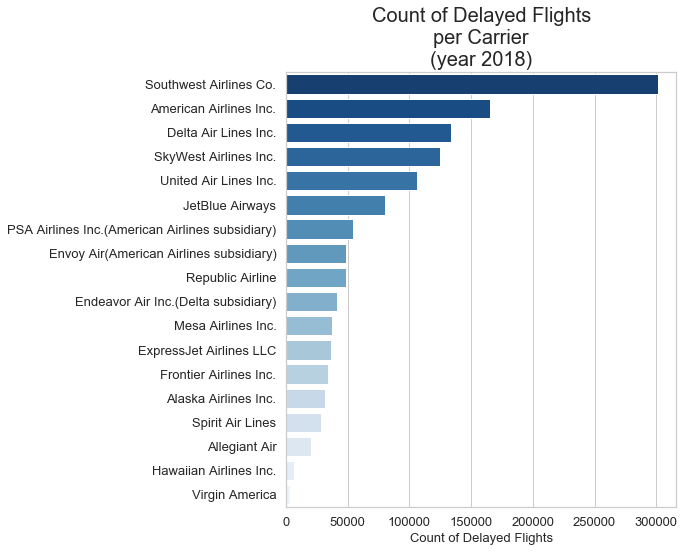

In [29]:
# Calculating total count of delayed flights per carrier
data_carrier_delay = delay_df.groupby('OP_UNIQUE_CARRIER')['YEAR'].count().sort_values(ascending=False)
# Renaming columns to carrier full name for the plot
data_carrier_delay.index = data_carrier_delay.index.map(carrier_dict)
plot_graph(data_carrier_delay, size = (7,8),
           title = 'Count of Delayed Flights\nper Carrier\n(year 2018)')

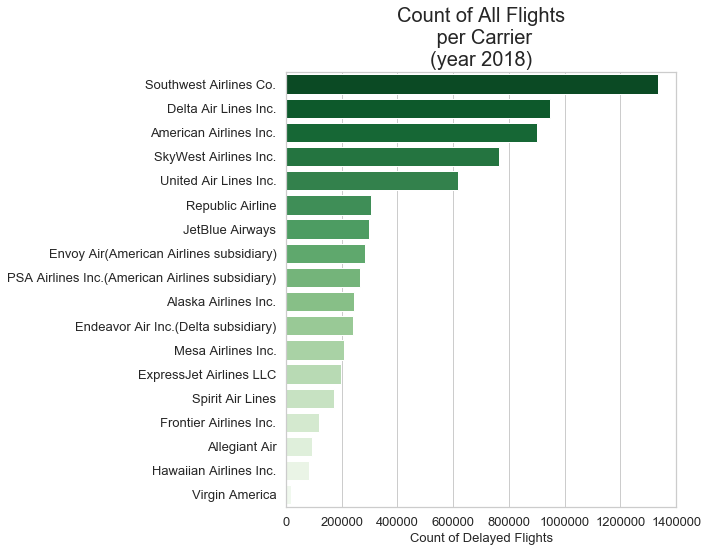

In [30]:
# Calculating total count of delayed flights per carrier
data_carrier_all = df.groupby('OP_UNIQUE_CARRIER')['YEAR'].count().sort_values(ascending=False)
# Renaming column names to carrier names for the plot
data_carrier_all.index = data_carrier_all.index.map(carrier_dict)
plot_graph(data_carrier_all, size = (7,8), color = 'Greens_r',
           title = 'Count of All Flights\n per Carrier\n(year 2018)')

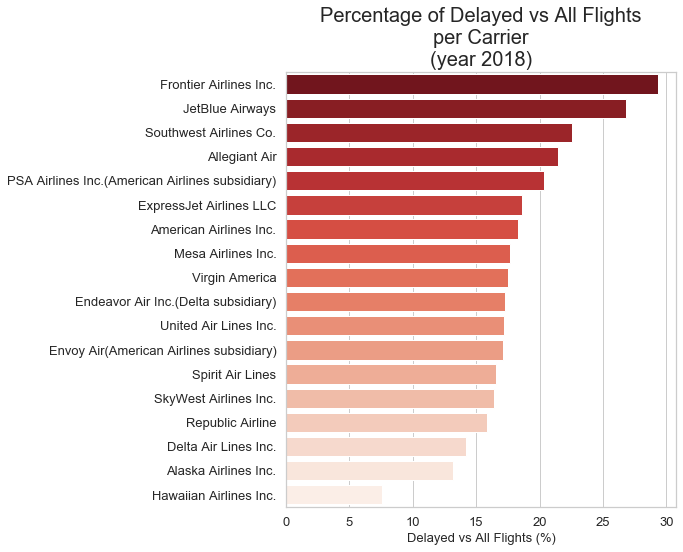

In [31]:
# Calculating percentage of delayed vs all flights per carrier
carrier_percentage = (data_carrier_delay/data_carrier_all)*100
carrier_percentage = carrier_percentage.sort_values(ascending=False)
plot_graph(carrier_percentage, size = (7,8), color = 'Reds_r', 
           title = 'Percentage of Delayed vs All Flights\nper Carrier\n(year 2018)',
           xlabel = 'Delayed vs All Flights (%)')

**Observation:**  
Airlines with the most delayed flights have the highest volume of flights in general. But when we look at the percentage of delayed flight vs all flights handled by this carrier we see a different list. Frontier, JetBlue, and Southwest make the top of the list.  
Carried - another important feature to consider.

### Distribution Per Origin Airport 

In [16]:
# Setting a dictionary of origin airport names for the plot
airport_dict = {'ORD': "Chicago O'Hare", 
                 'ATL': 'Atlanta', 
                 'DFW': 'Dallas/Fort Worth', 
                 'SFO': 'San Francisco', 
                 'DEN': 'Denver', 
                 'EWR': 'Newark',
                 'LGA': 'LaGuardia', 
                 'LAX': 'Los Angeles', 
                 'CLT': 'Charlotte Douglas',
                 'MDW': 'Chicago Midway',
                 'BOS': 'Boston', 
                 'PHX': 'Phoenix Sky Harbor', 
                 'LAS': 'McCarran',
                 'MCO': 'Orlando', 
                 'IAH': 'George Bush Intercontinental', 
                 'DCA': 'Ronald Reagan Washington',
                 'PHL': 'Philadelphia',
                 'MSP': 'Minneapolis−Saint Paul',
                 'JFK': 'John F. Kennedy', 
                 'DTW': 'Detroit Metropolitan Wayne'}

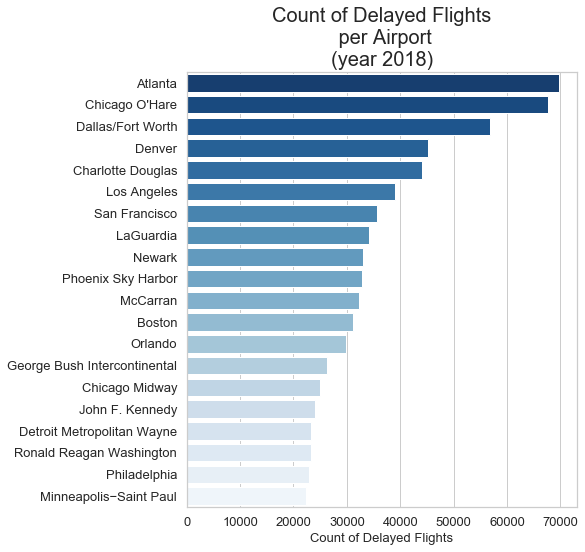

In [17]:
# Calculating total count of delayed flights per origin airport
data_origin_delay = delay_df.groupby('ORIGIN')['YEAR'].count().sort_values(ascending=False).head(20)
# Renaming columns into airport names for the plot
data_origin_delay.index = data_origin_delay.index.map(airport_dict)
plot_graph(data_origin_delay, size = (7,8),
           title = 'Count of Delayed Flights\n per Airport\n(year 2018)')

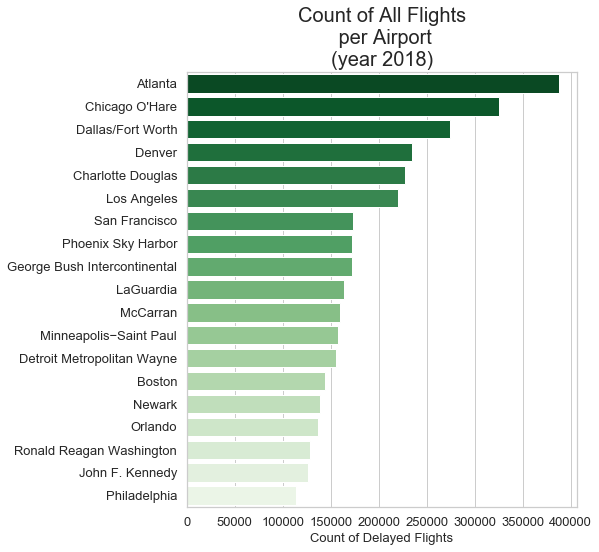

In [18]:
# Calculating total count of all flights per origin airport
data_origin_all = df.groupby('ORIGIN')['YEAR'].count().sort_values(ascending=False).head(20)
# Renaming columns to airport names for the plot
data_origin_all.index = data_origin_all.index.map(airport_dict)
plot_graph(data_origin_all,
           title = 'Count of All Flights\n per Airport\n(year 2018)',
           size = (7,8), color = "Greens_r")

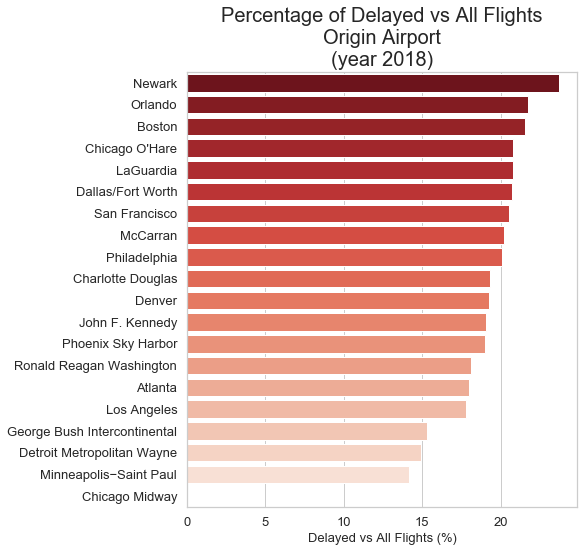

In [19]:
# Calculating total percentage of delayed vs all flights per origin airport
origin_percentage = (data_origin_delay/data_origin_all)*100
# Renaming columns to airport name for the plot
origin_percentage = origin_percentage.sort_values(ascending=False)
plot_graph(origin_percentage, size = (7,8), color = 'Reds_r',
           title = 'Percentage of Delayed vs All Flights\nOrigin Airport\n(year 2018)',
           xlabel = 'Delayed vs All Flights (%)')

**Observation:**  
Same situation with Airports. Most delayed flights are the airports with highest count of flights, but when we look closer, and get percentage list with delayed vs all flights by airport, airports with highest delays are Newark, Orlando and Boston International Airports.  
Airport of origin will be included in our feature list.

### Distribution Per Day of a Month

In [36]:
# Function that plots distribution vertically for each variable
def plot_vertical(df, title, size = (12,5), ylabel = '', color = 'Blues_r', 
                  xlabel = 'Count of Delayed Flights (count)'):
    plt.figure(figsize=size);
    sns.set(style="whitegrid")
    
    pal = sns.color_palette(color, len(df))
    # credit: http://stackoverflow.com/a/6266510/1628638
    rank = df.argsort().argsort()   

    sns.barplot(x=df.index, 
                y=df, 
                palette=np.array(pal[::-1])[rank],
                orient = 'v');

    plt.title (title, size=20);
    plt.ylabel(ylabel, size = 13);
    plt.xlabel(xlabel, size = 13);
    # setting size of yticks and xticks to 20
    plt.yticks(size = 13);
    plt.xticks(size = 13);

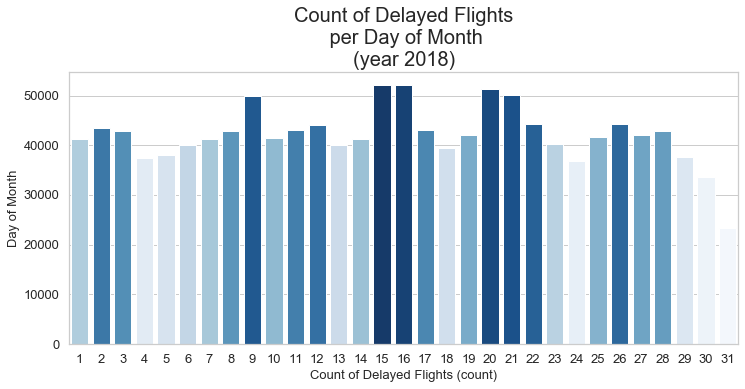

In [37]:
# Calculating total count of all flights per day of month
data_day_delay = delay_df.groupby('DAY_OF_MONTH')['YEAR'].count()
plot_vertical(data_day_delay, size = (12,5), ylabel = 'Day of Month', 
              title = 'Count of Delayed Flights\n per Day of Month\n(year 2018)')

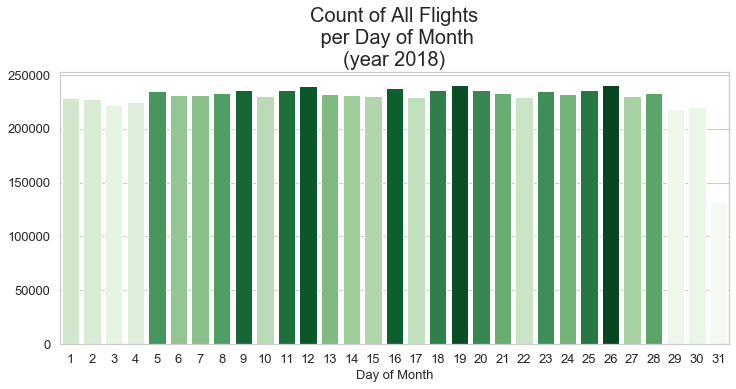

In [38]:
# Calculating total percentage of all flights per day of month
data_day_all = df.groupby('DAY_OF_MONTH')['YEAR'].count()
plot_vertical(data_day_all, size = (12,5), color = "Greens_r",
           title = 'Count of All Flights\n per Day of Month\n(year 2018)',
           xlabel = 'Day of Month')

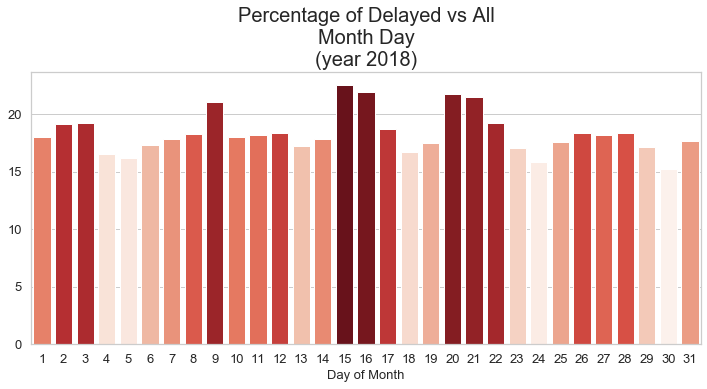

In [39]:
# Calculating total percentage of all vs delayed flights per day of month
day_percentage = (data_day_delay/data_day_all)*100
plot_vertical(day_percentage, 
           title = 'Percentage of Delayed vs All\nMonth Day\n(year 2018)',
           size = (12,5), color = 'Reds_r', xlabel = 'Day of Month')

**Observation:**  
Based on the graphs it looks that count of month is cyclical and primarily effect by days of the week. We wont be using this category as a feature in our predictive models.

### Distribution Per Daily Hour

In [40]:
# Extracting two digits representing hours from the scheduled departure time
df['CRS_DEP_TIME_HR'] = df['CRS_DEP_TIME'].astype(int).astype(str).apply(lambda x: x.zfill(4))
df['CRS_DEP_TIME_HR'] = df['CRS_DEP_TIME_HR'].str[:2].astype(int)

# Checking the list of all hours in our dataframe
df['CRS_DEP_TIME_HR'].unique()

array([ 6,  8, 18, 14, 16, 15, 17, 10, 12, 22,  7,  9, 11, 19, 23, 13, 21,
        5, 20,  0,  1,  2,  4,  3])

In [41]:
# Extracting two digits representing hours from the scheduled arrival time
df['CRS_ARR_TIME_HR'] = df['CRS_ARR_TIME'].astype(int).astype(str).apply(lambda x: x.zfill(4))
df['CRS_ARR_TIME_HR'] = df['CRS_ARR_TIME_HR'].str[:2].astype(int)

# Checking the list of all hours in our dataframe
df['CRS_ARR_TIME_HR'].unique()

array([ 8, 11, 12, 20, 16, 14,  6, 17, 10, 15, 18, 23,  7,  5, 13, 21,  0,
       19, 22,  9,  4,  1,  2,  3, 24])

In [42]:
# Extracting two digits representing hours from the scheduled departure time
delay_df['CRS_DEP_TIME_HR'] = delay_df['CRS_DEP_TIME'].astype(int).astype(str).apply(lambda x: x.zfill(4))
delay_df['CRS_DEP_TIME_HR'] = delay_df['CRS_DEP_TIME_HR'].str[:2].astype(int)

/Users/juliev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juliev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


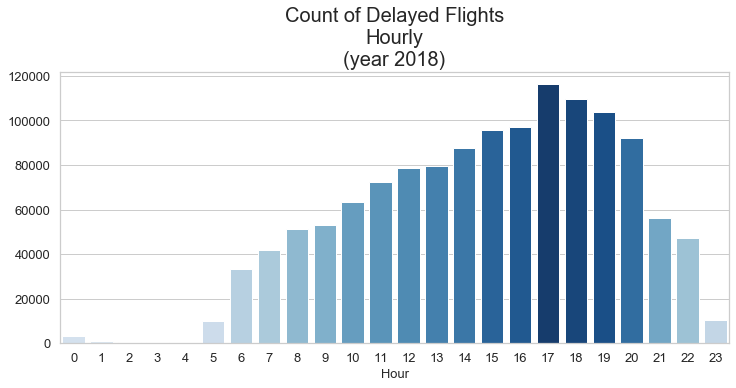

In [43]:
# Calculating total count of delayed flights per departure hour
data_hour_delay = delay_df.groupby('CRS_DEP_TIME_HR')['YEAR'].count()
plot_vertical(data_hour_delay,  size = (12,5), xlabel = 'Hour',
           title = 'Count of Delayed Flights\nHourly\n(year 2018)')

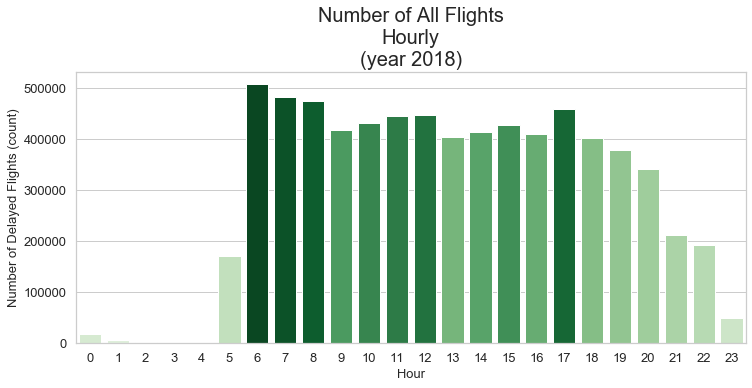

In [44]:
# Calculating total count of all flights per departure hour
data_hour_all = df.groupby('CRS_DEP_TIME_HR')['YEAR'].count()
plot_vertical(data_hour_all, size = (12,5),
           title = 'Number of All Flights\nHourly\n(year 2018)',
           xlabel = 'Hour', color='Greens_r', 
           ylabel = 'Number of Delayed Flights (count)')

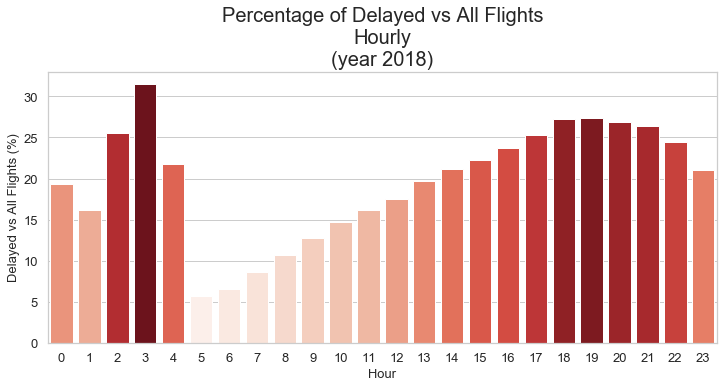

In [45]:
# Calculating total percentage of delayed vs all flights per departure hour
hour_percentage = (data_hour_delay/data_hour_all)*100
plot_vertical(hour_percentage,size = (12,5), color = 'Reds_r',
           title = 'Percentage of Delayed vs All Flights\nHourly\n(year 2018)',
           ylabel = 'Delayed vs All Flights (%)', xlabel = 'Hour')

**Observation:**  
If we only look at the total of all delayed flights and group them by hour the day, we see that most delayed flight occur in in the afternoon, culminating at 5pm and slowing down after 8pm. When we compare all delayed flights to all flights taken at a specific hour we notice that the highest percentage of delays occur during the night hours 2-3pm and in the evening hours: 6-9pm. This could be caused of changed of shifts in airport and carrier staff along with the volume of all flights taken at that hour.  
Hour - important feature to include. We might cluster the data by hour or group the hours into 4-6 hours together to avoid over fitting.

### Distribution of Departure Delays (minutes)

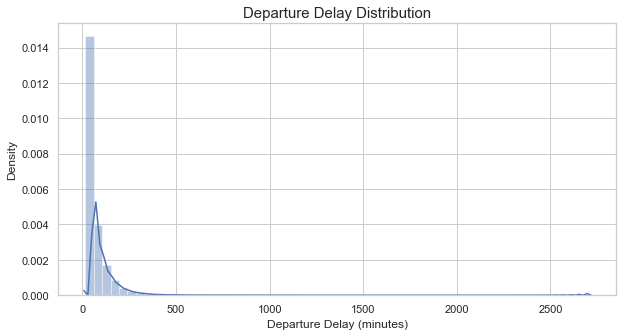

In [46]:
# Reviewing the distribution of delayed flights in minutes
plt.figure(figsize=(10,5));
sns.distplot(delay_df['DEP_DELAY'], bins=60);
plt.title("Departure Delay Distribution", size=15)
plt.xlabel("Departure Delay (minutes)", size=12)
plt.ylabel("Density", size=12);

**Observation:**  
Most delays are within 100 minutes.

### Distribution of Departure Delay Groups

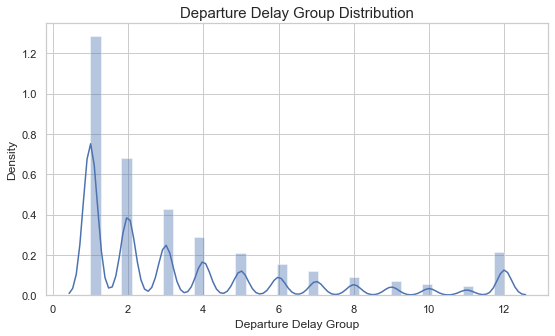

In [47]:
# Reviewing the distribution of delayed flights by delay groups (15 minutes each)
plt.figure(figsize=(9,5));
sns.distplot(delay_df['DEP_DELAY_GROUP'], bins=40)### Distribution Per Month;
plt.title("Departure Delay Group Distribution", size=15)
plt.xlabel("Departure Delay Group", size=12)
plt.ylabel("Density", size=12);

**Observation:**  
Delay groups are broken into 15 minutes each. We observe similar situation here: most delays happen in first 5 groups (5*15=75 minutes).

### Distribution Per Flight Duration

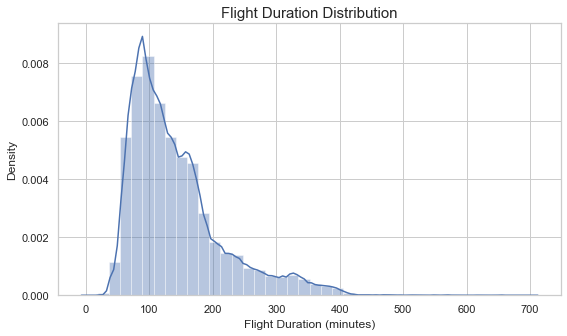

In [48]:
# Distribution Per Scheduled Elapsed Time of Flight
plt.figure(figsize=(9,5));
sns.distplot(df['CRS_ELAPSED_TIME'], bins=40);
plt.title("Flight Duration Distribution", size=15)
plt.xlabel("Flight Duration (minutes)", size=12)
plt.ylabel("Density", size=12);

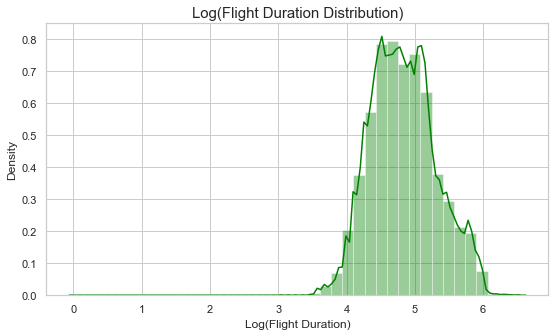

In [50]:
# Plotting logarithm of 'CRS_ELAPSED_TIME' to view if turns into normal distribution
plt.figure(figsize=(9,5));
sns.distplot(np.log(df['CRS_ELAPSED_TIME']), bins=40, color='green');
plt.title("Log(Flight Duration Distribution)", size=15)
plt.xlabel("Log(Flight Duration)", size=12)
plt.ylabel("Density", size=12);

**Observation:**  
Flights duration distribution is right skewed and logarithm of this distribution look more normal. We will consider using both, flight duration column and its logarithm for regression model.

### Distribution Per Distance

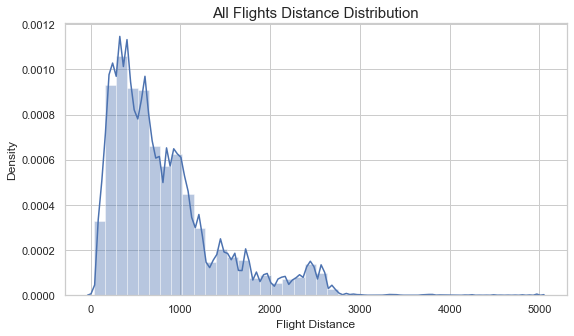

In [51]:
# Distribution All Flights Per Flight Distance
plt.figure(figsize=(9,5));
sns.distplot(df['DISTANCE'], bins=40);
plt.title("All Flights Distance Distribution", size=15)
plt.xlabel("Flight Distance", size=12)
plt.ylabel("Density", size=12);

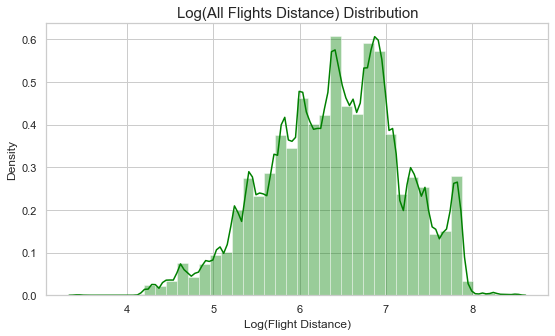

In [52]:
plt.figure(figsize=(9,5));
sns.distplot(np.log(df['DISTANCE']), bins=40, color='green');
plt.title("Log(All Flights Distance) Distribution", size=15)
plt.xlabel("Log(Flight Distance)", size=12)
plt.ylabel("Density", size=12);

**Observation:**  
Same situation here with flight distance. We might use both distance column and its logarithm for linear model.

In [53]:
df.shape

(7096846, 56)

In [54]:
df.to_csv('../data/2018_reporting_clean_final.csv', index = False)